** Summary**

We introduced the notion of a random variable and associated probabilty distribution and density functions

Then we defined the first two moments of those functions,  mean and variance

Considering two random variables, we defined joint and marginal distributions and the idea of statistical independence

Two important distributions are normal and chi-square: 

    normally distributed random variables sum to normal distributions 
    
    squares of equally distributed random variables sum to chi-square distributions
    
We saw some ways of calcuating the distributions of functions of a random variable with a known distribution

Finally we defined conditional probability and discussed Bayes' theorem, which allows us to correct our prior information on the basis of new observations

## Part 3. Parameter Estimation
$$ \def\pr{\hbox{Pr}}
\def\var{\hbox{var}}
\def\cov{\hbox{cov}}
\def\corr{\hbox{corr}}
\def\dmX{\un{\mathcal{X}}}
\def\dmG{\un{\mathcal{G}}}
\def\dmK{\un{\mathcal{K}}}
\def\dmS{\un{\mathcal{S}}}
\def\dmC{\un{\mathcal{C}}}
\def\dmZ{\un{\mathcal{Z}}}
\def\bma{{\mbox{\boldmath $\alpha$}}}
\def\bmb{{\mbox{\boldmath $\beta$}}}
\def\bmu{{\mbox{\boldmath $\mu$}}}
\def\bme{{\mbox{\boldmath $\epsilon$}}}
\def\bmS{{\mbox{\boldmath $\Sigma$}}}
\def\bmL{{\mbox{\boldmath $\Lambda$}}}
\def\bmd{{\mbox{\boldmath $\delta$}}}
\def\bmD{{\mbox{\boldmath $\Delta$}}}
\def\bmG{{\mbox{\boldmath $\Gamma$}}}
\def\bmphi{{\mbox{\boldmath $\phi$}}}
\def\bmPhi{{\mbox{\boldmath $\Phi$}}}
\def\bmpsi{{\mbox{\boldmath $\psi$}}}
\def\bmtheta{{\mbox{\boldmath $\theta$}}}
\def\eq{\begin{equation}}
\def\eeq{\end{equation}}
\def\i{{\bf i}}
\def\un#1{{\bf #1}}$$

We have defined some distribution functions for random  variables along
with their moments or *parameters* (mean and variance).
Since continuous distributions describe infinite populations, the *true* values
of the parameters are inaccessible.

So the question arises:


*How do we estimate a distribution's parameters from observations?*




### Sample functions

Let $Z_1, Z_2\dots  Z_n$ be independent
random vectors which all have the same distribution function
$P(z)$ with  mean $\langle  Z\rangle$ and variance $\var(Z)$.
These random variables are referred to as a *sample of the
distribution* and are said to be *independent and identically distributed* (i.i.d.).
Any function of them is called a *sample
function* and is itself a random variable.

The sample functions of interest are those which can be used
to estimate the mean and variance of the distribution
$P(z)$. These are the *sample mean*

$$
\bar{Z} = {1\over n}\sum_{i=1}^n Z_i
$$

and the *sample variance*

$$
 S = {1\over n-1}\sum_{i=1}^n(Z_i - \bar Z )^2
$$

The sample functions are called *unbiased estimators* because
their means are equal to the corresponding moments of $P(z)$, that is,

$$
\langle\bar{ Z}\rangle = {1\over n}\sum_i\langle Z_i\rangle =
 {1\over n}n\langle Z\rangle = \langle Z\rangle
$$

and (next slide) 

$$
\langle  S \rangle = \var(Z).
$$

Particular realizations $\bar{z}$ and $ s$ of the sample functions 
are called *unbiased estimates*.

**Proof:**

$$\eqalign{
(n-1)S &= \sum_i (Z_i-\bar Z)^2 \cr
& = \sum_i \Big(Z_i^2 - 2Z_i\bar Z - \bar Z^2\Big)\cr
& = \sum_i Z_i^2 -2n\bar Z^2 + n\bar Z^2.}
$$
Therefore
$$\eqalign{
(n-1)S &= \sum_i Z_i^2 - n\bar Z^2\cr
&= \sum_i Z_i^2 - n{1\over n^2}\left(\sum_i Z_i\right)\left(\sum_i Z_i\right).}
$$


Expanding the product of sums yields
$$
(n-1)S = \sum_i Z_i^2 - {1\over n}\sum_i Z_i^2 - {1\over n}\sum_{i\ne i'}Z_i Z_{i'}.
$$
But $Z_i$ and $Z_{i'}$ are independent random variables so that
$$
\langle Z_i Z_{i'}\rangle = \langle Z\rangle^2,
$$
Therefore, since the double sum above has $n(n-1)$ terms,
$$
(n-1)\langle S\rangle = n\langle Z^2\rangle - {1\over n}\ n\langle Z^2\rangle -{1\over n}\ n(n-1)\langle Z\rangle^2
$$
or
$$
\langle S\rangle = \langle Z^2\rangle -\langle Z\rangle^2 = \var(Z).
$$



The denominator $(m-1)$ in the definition of the sample covariance
matrix is thus seen to be required for unbiased estimation of the
covariance matrix and to be due to the appearance of the sample mean
$\un{\bar Z}$ rather than the distribution mean $\langle\un Z\rangle$ in
the definition.

We already know that the mean $\bar Z$ of i.i.d. samples from
a normal distribution $\mathcal{N}(\mu,\sigma^2)$ (the sample mean)  is itself normally distributed  with mean $\mu$ and
variance $\sigma^2/n$. What about the sample variance?

**Theorem:**

If $S$ is the sample variance of an independent random sample of size $n$ drawn
 from a normally distributed population with mean $\mu$ and variance $\sigma^2$, then the
 random variable
 
 $$
 (n-1)S/\sigma^2
 $$
 
 is independent of $\bar Z$ and has the chi-square distribution with $n-1$ degrees of freedom.

estimated mean: 0.035112 (true mean: 0.0)
estimated variance: 0.991388 (true variance: 1.0)
boostrap estimated variance of mean: 0.010095 (true variance of mean: 0.010000)


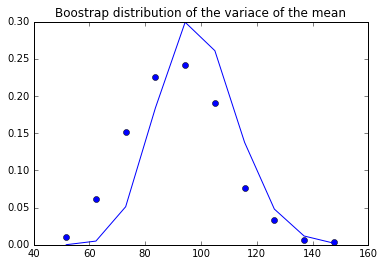

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st

np.random.seed(1234)
n = 100
observations = np.random.normal(size=n)

print 'estimated mean: %f (true mean: 0.0)' % np.mean(observations) 
print 'estimated variance: %f (true variance: 1.0)' % np.var(observations)

# 1000 boostrap samples
samples = np.array([np.random.choice(observations,n) for i in range(1000)])
bsmeans = np.mean(samples,1)
print 'boostrap estimated variance of mean: %f (true variance of mean: %f)' % (np.var(bsmeans), 1.0/n)

bsvars = np.var(samples,1)
y,x = np.histogram((n-1)*bsvars)
y = y/float(np.sum(y))
c = st.chi2.pdf(x[:-1],n-1)
c = c/np.sum(c)
plt.plot(x[:-1],y,'bo',x[:-1],c)
plt.title('Boostrap distribution of the variace of the mean')
plt.show()

### Interval estimation

The estimators we have seen so far are referred to as point estimators because
they are real numbers. The estimated value of any distribution parameter will of course
differ from the true value. Generally one prefers to quote an
interval within which, to some specified degree of confidence, the true value will lie.

The sample mean for a random variable $Z$ is normally distributed with variance $\sigma^2/n$,

$$
\bar Z \sim \mathcal{N}(\mu,\sigma^2/n).
$$

and therefore $(\bar Z-\mu)/(\sigma/\sqrt{n})$ is standard normally distributed. Hence, for any $t$,

$$
\pr\left(-t<{\bar Z-\mu\over\sigma/\sqrt{n}}\le t\right)=\Phi(t)-\Phi(-t)=2\Phi(t)-1.
$$

This may be written in the form

$$
\pr\left(\bar Z -t\ {\sigma\over\sqrt{n}} \le \mu < \bar Z + t\ {\sigma\over\sqrt{n}}\right)=2\Phi(t)-1.
$$

Thus we can say that the probability that the *random interval*

$$
\left(\bar Z -t\ {\sigma\over\sqrt{n}},\bar Z +t\ {\sigma\over\sqrt{n}}\right)
$$

covers the unknown mean value $\mu$ is $2\Phi(t)-1$.

Once a realization of the random interval has
been obtained and reported, i.e., by plugging a realization of $\bar Z$ into the above equation, then
$\mu$ either lies within it or it doesn't. A *degree of confidence* for the reported interval is
conventionally given and expressed in terms of a (usually small) quantity $\alpha$ defined by

$$
1-\alpha = 2\Phi(t)-1.
$$


This determines $t$ in  according to

$$
 \Phi(t)=1-\alpha/2.
$$

For given $\alpha$, $t$ can be read from the table of the normal distribution.
One then says that the interval

$$
\left(\bar z -t\ {\sigma\over\sqrt{n}},\bar z +t\ {\sigma\over\sqrt{n}}\right)
$$

covers the unknown parameter $\mu$ with confidence $1-\alpha$.

For $n > 30$ it is *safe* to plug in $\sqrt{s}$ for $\sigma$. Otherwise the 
*Student t distribution* must be used.



We can similarly derive a confidence interval for the estimated variance. Define $\chi^2_{\alpha;n}$ by

$$
{\rm Pr}(Z\ge \chi^2_{\alpha;n}) = \alpha
$$

for a random variable $Z$ having the chi-square distribution with $n$ degrees of freedom. Then

$$
{\rm Pr}\left( \chi^2_{1-\alpha/2;n-1} < {(n-1)S\over \sigma^2} < \chi^2_{\alpha/2;n-1}\right) = 1-\alpha
$$

or

$$
{\rm Pr}\left( {(n-1)S\over\chi^2_{\alpha/2;n-1}} < \sigma^2 < {(n-1)S\over\chi^2_{1-\alpha/2n-1}}\right) = 1 - \alpha.
$$

So we can say that, if $s$ is the estimated variance 
of a random sample of size $n$ from a normal
population, then

$$
{(n-1)s\over\chi^2_{\alpha/2;n-1}} < \sigma^2 < {(n-1)s\over\chi^2_{1-\alpha/2;n-1}}
$$

is a $1-\alpha$ confidence interval for $\sigma^2$.

In [2]:
from math import sqrt
from scipy.stats import norm,chi2
import numpy as np

def x2(a,n):
    return chi2.ppf(1-a,n)

n = 1000
a= 0.05
z = np.random.random(n)
zbar = np.sum(z)/n
s = np.sum((z-zbar)**2)/(n-1)
print 'sample variance: %f'%s
lower = (n-1)*s/x2(a/2,n-1)
upper = (n-1)*s/x2(1-a/2,n-1)
print '%i percent confidence interval: (%f, %f)'\
               %(int((1-a)*100),lower,upper)
print 'sample mean: %f'%zbar
t = norm.ppf(1-a/2)
sigma = sqrt(s)
lower = zbar-t*sigma/sqrt(n)
upper = zbar+t*sigma/sqrt(n)
print '%i percent confidence interval: (%f, %f)'\
               %(int((1-a)*100),lower,upper)

sample variance: 0.083475
95 percent confidence interval: (0.076613, 0.091308)
sample mean: 0.509381
95 percent confidence interval: (0.491474, 0.527288)
